In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class OPUModuleNumpy(object):
    def __init__(self, input_features, output_features, activation=None, bias=False,
                 initial_log_scale='auto', exponent=2, dtype='float32'):
        super(OPUModuleNumpy, self).__init__()
        
        self.real_matrix = np.random.normal(loc=0.0, scale=np.sqrt(0.5), size=(input_features, output_features)).astype(dtype)
        self.img_matrix = np.random.normal(loc=0.0, scale=np.sqrt(0.5), size=(input_features, output_features)).astype(dtype)
        
        if bias:
            self.bias = np.random.uniform(low=0.0, high=2 * np.pi, size=(1, output_features))
        else:
            self.bias = None
            
        self.activation = activation
        
        self.exponent = exponent
        
        if initial_log_scale == 'auto':
            self.log_scale = -0.5 * np.log(input_features)
        else:
            self.log_scale = initial_log_scale
        
    def project(self, data, matrix):
        return np.dot(data, matrix)
        
    def forward(self, data):
        out_real = self.project(data, self.real_matrix) ** self.exponent
        out_img = self.project(data, self.img_matrix) ** self.exponent
        
        output = (out_real + out_img)
        if self.bias is not None:
            output += self.bias
        if self.activation is not None:
            output = self.activation(output)

        return np.exp(self.log_scale) * output

In [4]:
phi = np.random.uniform(low=0, high=2*np.pi, size=(1000))
r = 1
x = r*np.cos(phi)
y = r*np.sin(phi)
reference_vector = np.array([r*np.cos(0), r*np.sin(0)])

In [5]:
samples = np.vstack([x, y]).T

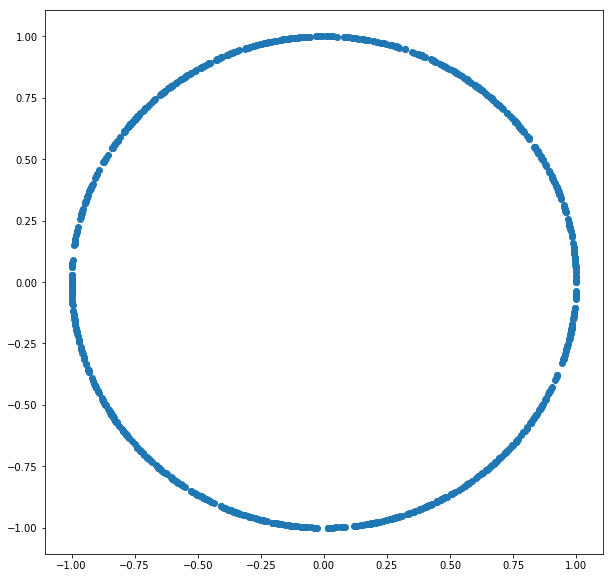

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(samples[:,0], samples[:,1])

In [9]:
samples

array([[ 0.54689032,  0.83720426],
       [ 0.18534862, -0.98267283],
       [-0.76754205,  0.6409986 ],
       ...,
       [ 0.7448068 ,  0.66728017],
       [ 0.16764131, -0.98584806],
       [ 0.99871702, -0.05063909]])

In [10]:
module = OPUModuleNumpy(2, 1000, activation=None)

In [11]:
projected_samples = module.forward(samples)

In [13]:
reference_projection = module.forward(reference_vector)

In [15]:
cov = projected_samples @ reference_projection

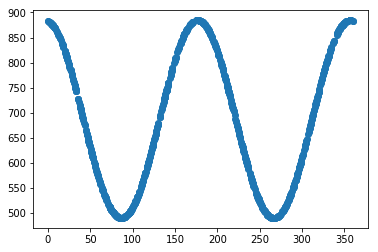

In [17]:
plt.scatter(np.degrees(phi), cov)

## Adding a bias

In [61]:
dummy = 1

In [75]:
bias_module = OPUModuleNumpy(2+dummy, 1000, activation=None, exponent=2)

In [63]:
data = np.hstack([samples, np.ones((samples.shape[0], dummy))])

In [64]:
new_reference = np.append(reference_vector, dummy)

In [65]:
new_reference

array([1., 0., 1.])

In [66]:
projected_samples = bias_module.forward(data)

In [67]:
reference_projection = bias_module.forward(new_reference)

In [68]:
cov = projected_samples @ reference_projection

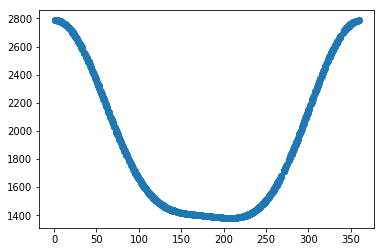

In [44]:
plt.scatter(np.degrees(phi), cov)

## Changing the degree + bias

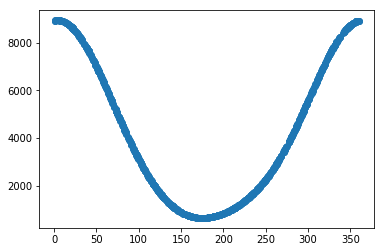

In [52]:
# exponent 3
plt.scatter(np.degrees(phi), cov)

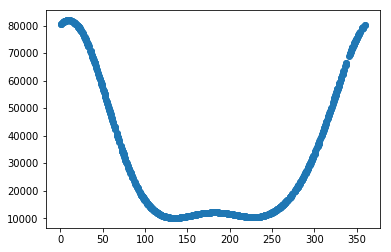

In [60]:
# exponent 4
plt.scatter(np.degrees(phi), cov)

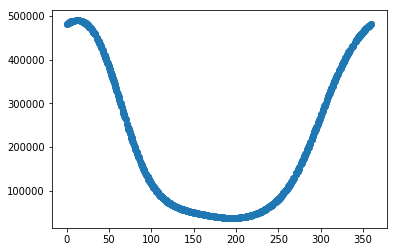

In [70]:
# exponent 5
plt.scatter(np.degrees(phi), cov)

# Draws from the GP prior

In [96]:
xlim = (-4, 4)
X = np.linspace(*xlim, num=100)

In [97]:
def feature_kernel(X, module):
    projection = module.forward(X)
    return projection @ projection.T

Exponent: 0.5
Bias: 0


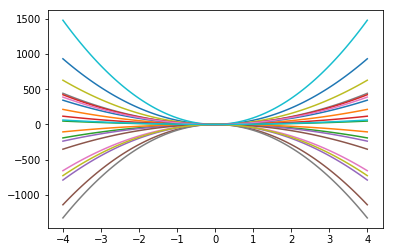

Exponent: 0.5
Bias: 1


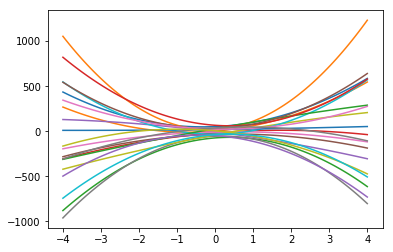

Exponent: 0.5
Bias: 10


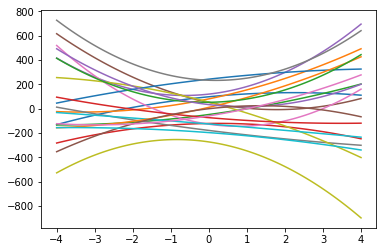

Exponent: 0.5
Bias: 100


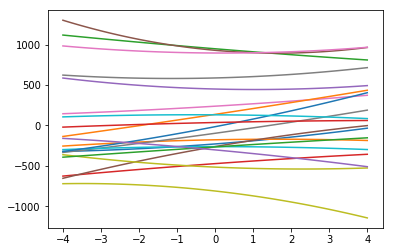

Exponent: 1
Bias: 0


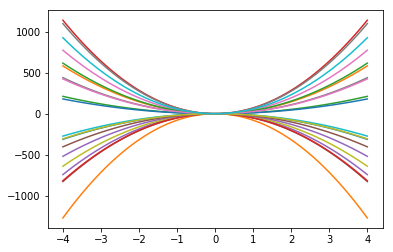

Exponent: 1
Bias: 1


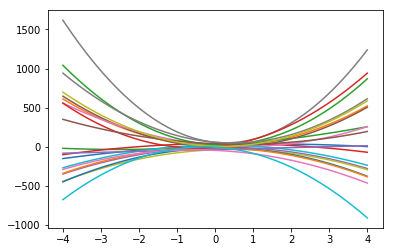

Exponent: 1
Bias: 10


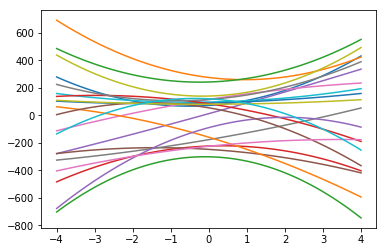

Exponent: 1
Bias: 100


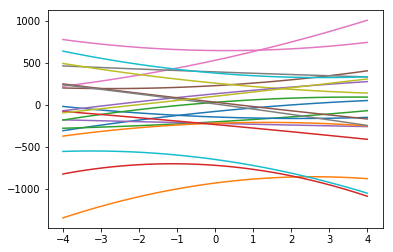

Exponent: 2
Bias: 0


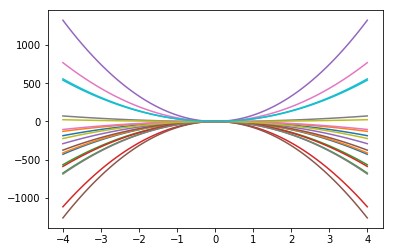

Exponent: 2
Bias: 1


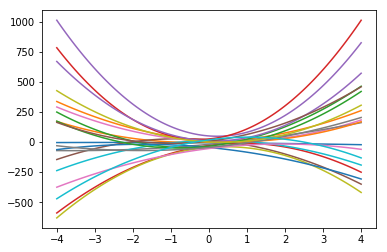

Exponent: 2
Bias: 10


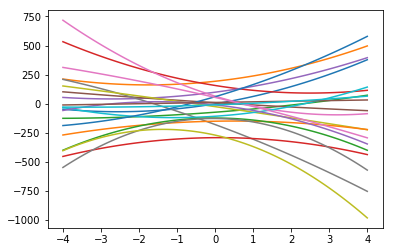

Exponent: 2
Bias: 100


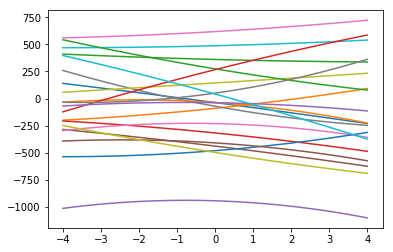

Exponent: 3
Bias: 0


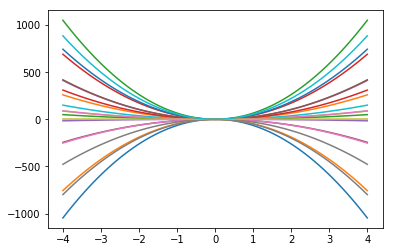

Exponent: 3
Bias: 1


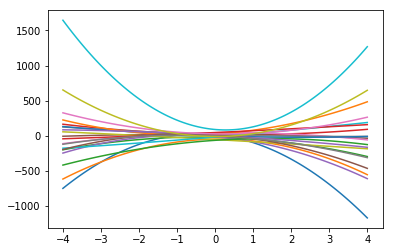

Exponent: 3
Bias: 10


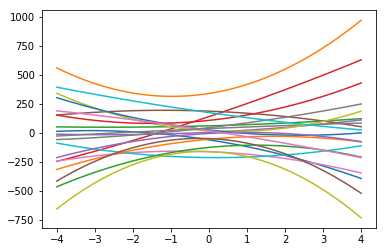

Exponent: 3
Bias: 100


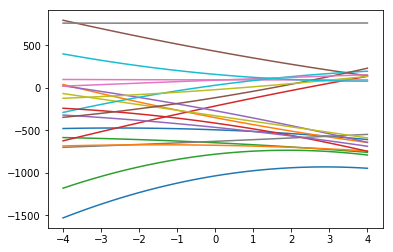

In [102]:
for exponent in [0.5, 1,2,3]:
    for bias in [0,1,10,100]:
    
        print('Exponent:', exponent)
        print('Bias:', bias)

        bias_module = OPUModuleNumpy(1+bias, 1000, activation=None, exponent=2)

        data = np.hstack([X[:, None], np.ones((X.shape[0], bias))])
        K = feature_kernel(data, bias_module)

        gp_samples = np.random.multivariate_normal(np.zeros(K.shape[0]), K, 20)

        plt.figure()
        for i in range(len(gp_samples)):
            plt.plot(X, gp_samples[i,:])
        plt.show()

## The same for the polynomial kernel

In [105]:
def poly_kernel(X, degree):
    return (X @ X.T)**degree

Exponent: 1
Bias: 0


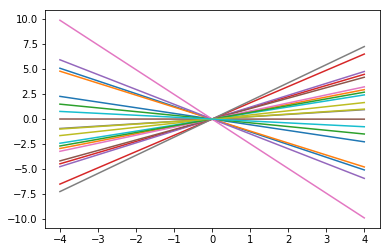

Exponent: 1
Bias: 1


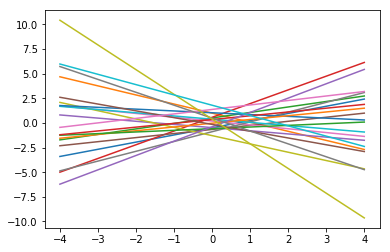

Exponent: 1
Bias: 10


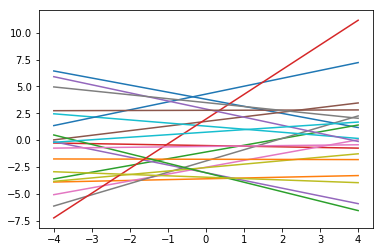

Exponent: 1
Bias: 100


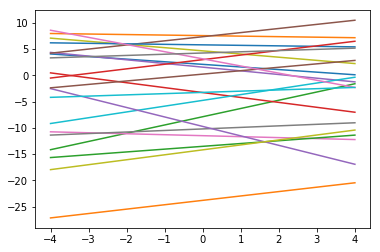

Exponent: 2
Bias: 0


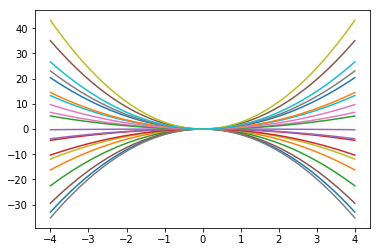

Exponent: 2
Bias: 1


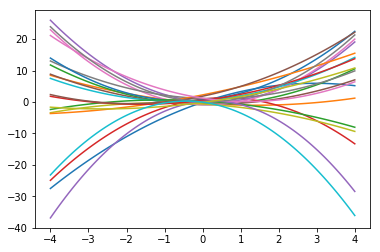

Exponent: 2
Bias: 10


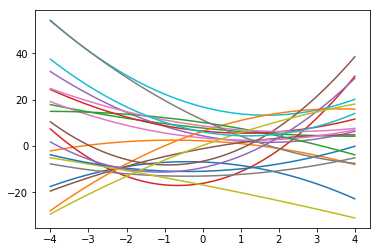

Exponent: 2
Bias: 100


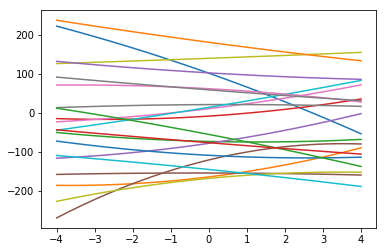

Exponent: 4
Bias: 0


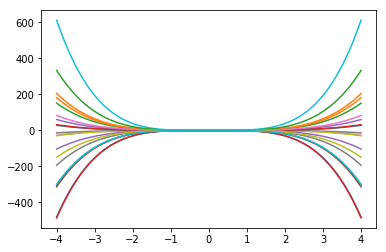

Exponent: 4
Bias: 1


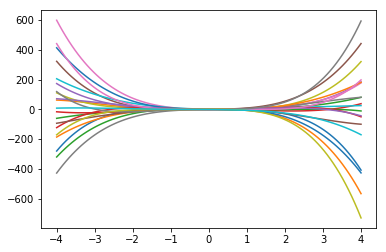

Exponent: 4
Bias: 10


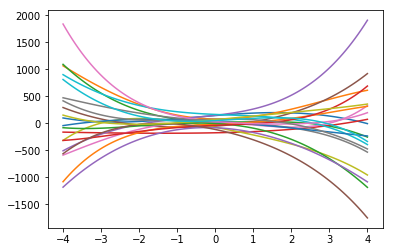

Exponent: 4
Bias: 100


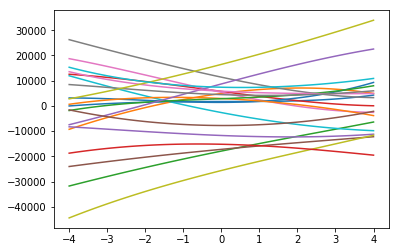

Exponent: 6
Bias: 0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


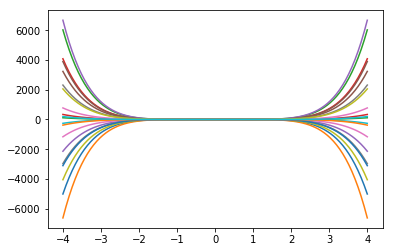

Exponent: 6
Bias: 1


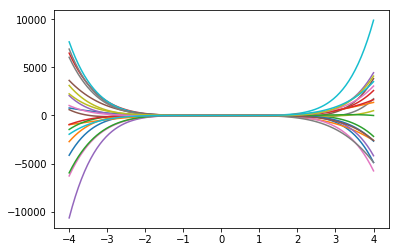

Exponent: 6
Bias: 10


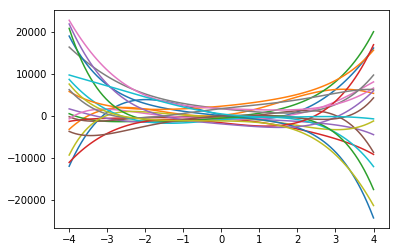

Exponent: 6
Bias: 100


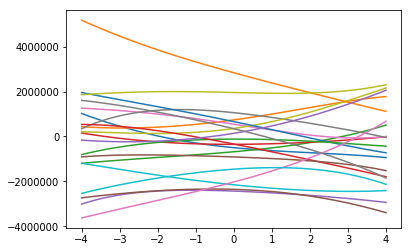

In [109]:
for exponent in [1,2,4, 6]:
    for bias in [0,1,10,100]:
    
        print('Exponent:', exponent)
        print('Bias:', bias)

        data = np.hstack([X[:, None], np.ones((X.shape[0], bias))])
        K = poly_kernel(data, exponent)

        gp_samples = np.random.multivariate_normal(np.zeros(K.shape[0]), K, 20)

        plt.figure()
        for i in range(len(gp_samples)):
            plt.plot(X, gp_samples[i,:])
        plt.show()